## Reproduces Extended Data Figure 3 in Lauer et al., Nature Methods 2022

- note, to preserve benchmark integrity, we load only the 70% training set data for any ground truth (GT) aspects of the plots, whereas the Extended Data in the paper shows statistics for the full datasets.

In [1]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Arial'
    
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style='ticks')

%matplotlib inline

In [ ]:
### Fun fact, this figure requires one more package: the Tailor Swift color maps ... 
!pip install swiftascmaps

Fig S3a

In [3]:
modelprefixes = [
    'baseline_efficientnet-b0',
    'baseline_efficientnet-b0_s4',
    'baseline_efficientnet-b7',
    'baseline_efficientnet-b7_s4',
    'baseline_resnet_50',
    'baseline_resnet_50_s4',
    'baseline_resnet_50_ms',
    'baseline_resnet_50_ms4',
]

def plot_networks_perf(
    df,
    cmap,
):
    fig, ax = plt.subplots(figsize=(5, 2.5))
    with sns.color_palette(cmap, 2), sns.axes_style("ticks"):
        sns.boxplot(
            x="rmse",
            y="network",
            hue="train",
            hue_order=["train", "test"],
            data=df,
            linewidth=1,
            ax=ax,
            orient="h",
            showfliers=False,
            order=modelprefixes,
        )
    ax.set_ylabel("")
    ax.set_xlabel("RMSE (pixels)")
    # ax.set_xlim(0, 20)
    # ax.tick_params(axis="x", length=0, rotation=45)
    ax.set_yticklabels(['B0_stride8', 'B0_stride4',
                        'B7_stride8', 'B7_stride4',
                        'ResNet50_stride8', 'ResNet50_stride4',
                        'DLCRnet_ms5_stride8', 'DLCRnet_ms5_stride4'],
                       va='center', ha='right')
    ax.xaxis.get_major_locator().set_params(integer=True)
    ax.get_legend().remove()
    sns.despine(trim=True, left=True)
    ax.xaxis.grid(True)
    fig.savefig(f'{cmap}.png', bbox_inches="tight", dpi=600)
    return ax, df

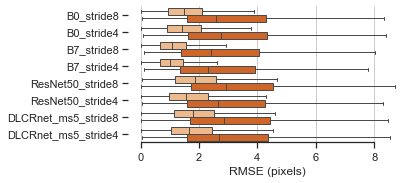

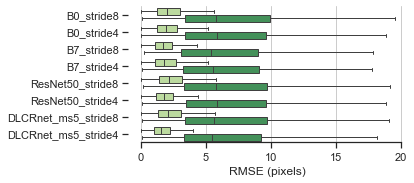

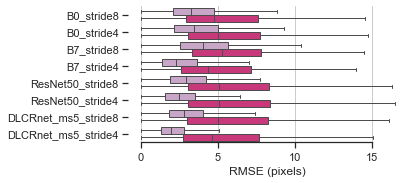

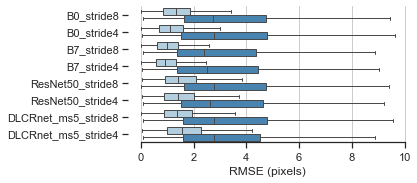

In [4]:
plot_networks_perf(
    pd.read_hdf('../data/figS3/perf_trimice.h5'),
    'Oranges',
)
plot_networks_perf(
    pd.read_hdf('../data/figS3/perf_pups.h5'),
    'YlGn',
)
plot_networks_perf(
    pd.read_hdf('../data/figS3/perf_marmosets.h5'),
    'PuRd',
)
plot_networks_perf(
    pd.read_hdf('../data/figS3/perf_fish.h5'),
    'Blues',
)

plt.show()

Fig S3c

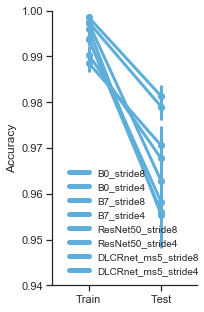

In [5]:
import pandas as pd
from collections import defaultdict
from swiftascmaps import lover

df = pd.read_hdf('../data/figS3/marmo_id.h5')
modelprefixes = [
    'baseline_efficientnet-b0',
    'baseline_efficientnet-b0_s4',
    'baseline_efficientnet-b7',
    'baseline_efficientnet-b7_s4',
    'baseline_id',
    'baseline_resnet_50_s4',
    'baseline_resnet_50_ms',
    'baseline_resnet_50_ms4',
]
colormap = lover
stats = defaultdict(list)
for network in modelprefixes:
    temp = df[df['network'] == network]
    stats[network].append(temp.groupby('train')
                            .agg(["mean", "sem"])
                            .reindex(['train', 'test']).to_numpy())

cmap = plt.get_cmap(colormap, len(modelprefixes))
colors = dict(zip(modelprefixes, cmap(range(len(modelprefixes)))))
sns.set_theme(style='ticks')
with sns.axes_style("ticks"):
    fig, ax = plt.subplots(tight_layout=True, figsize=(3, 4.5))
    for net, stat in stats.items():
        av = np.mean(stat, axis=0)
        ax.errorbar([0, 1], av[:, 0], yerr=av[:, 1],
                    color=colors[net], fmt='o-', lw=3)
        for arr in stat:
            ax.errorbar([0, 1], arr[:, 0], yerr=arr[:, 1],
                        color=colors[net], fmt='o-', alpha=0.5, lw=1)
    ax.set_xticks([0, 1])
    ax.set_xlim(-0.5, 1.5)
    ax.set_ylim(0.94, 1)
    ax.set_xticklabels(['Train', 'Test'])
    ax.set_ylabel('Accuracy')
    for loc, spine in ax.spines.items():
        if loc in ('top', 'right'):
            spine.set_visible(False)
    
networks = ['B0_stride8', 'B0_stride4',
            'B7_stride8', 'B7_stride4',
            'ResNet50_stride8', 'ResNet50_stride4',
            'DLCRnet_ms5_stride8', 'DLCRnet_ms5_stride4']
colors = dict(zip(networks, cmap(range(len(networks)))))
patches = [
    plt.Line2D([0, 0], [0, 0], color=color, label=f"{net}", lw=5)
    for net, color in colors.items()
]
fig.legend(
    handles=patches,
    loc="lower left",
    frameon=False,
    borderaxespad=0.0,
    bbox_to_anchor=[0.3, 0.1],
    fontsize=10
)
            
fig.savefig('figS3c.jpg', dpi=600)

plt.show()